<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Gamma Selection**

Gamma Correction pada citra
-----------------------------------------
Masukkan nilai Gamma: 3


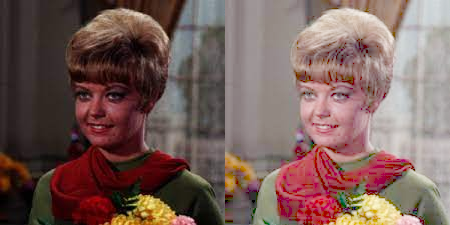

In [ ]:
print('Gamma Correction pada citra')
print('-----------------------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y, x, c] = np.clip(255 * (original[y, x, c] / 255.0) ** (1 / gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


# **Image Depth**

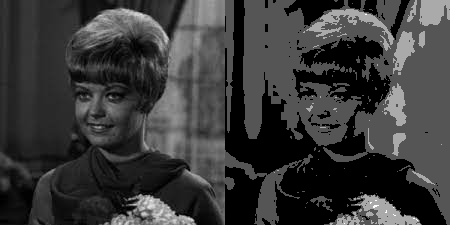

In [ ]:
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

# **Average Denoising**

In [92]:
import glob
from math import log10, sqrt

print('Average Denoising 5 citra')
print('------------------------')

img_amt = 5

def PSNR(ori, compressed):
  mse = np.mean((ori - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

ori = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

cv_img = []
for i in glob.glob('/content/drive/MyDrive/PCVK/img/galaxy2.jpg'):
  n = cv.imread(i)
  cv_img.append(n)

denoising_avg = np.mean(cv_img[:img_amt], axis=0).astype(np.uint8)

value = PSNR(ori, denoising_avg)
print(f"Nilai PSNR: {value} dB")

final_frame = cv.hconcat((ori, denoising_avg))
cv2_imshow(denoising_avg)


Average Denoising 5 citra
------------------------


TypeError: ignored

# **Masking**

AND (Dan)

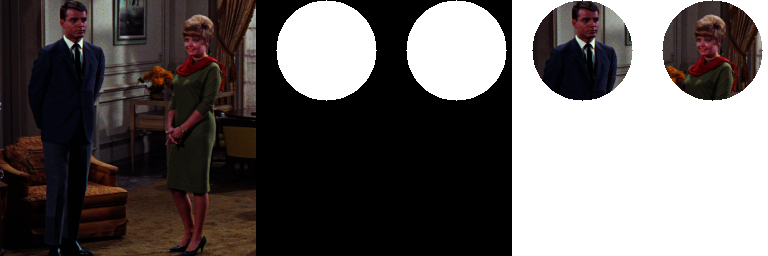

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img & mask & mask2
masked[mask==0] = 255

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

NOT (komplemen)

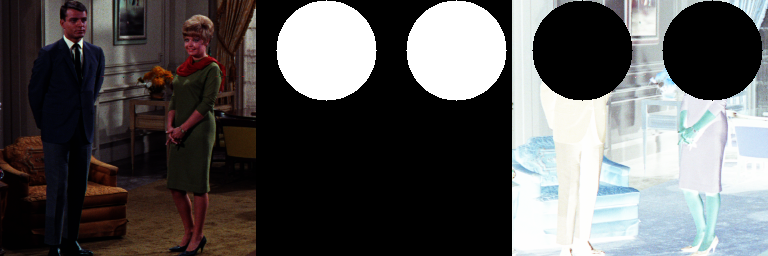

In [ ]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = ~img & ~mask & ~mask2

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

OR (atau)

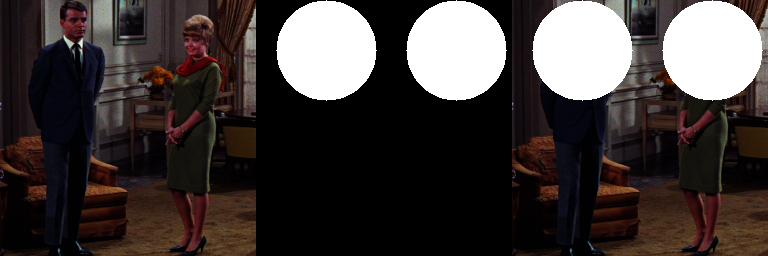

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img | mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

NAND (Not And)

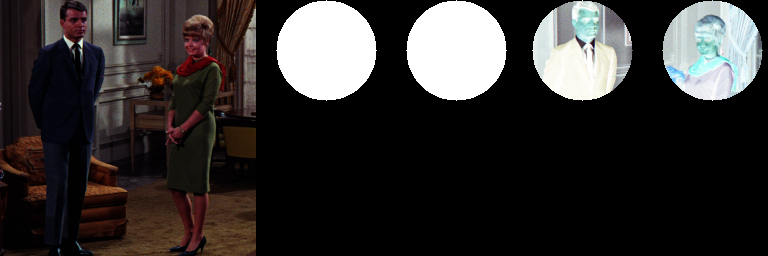

In [ ]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

XOR (Exclusive Or)

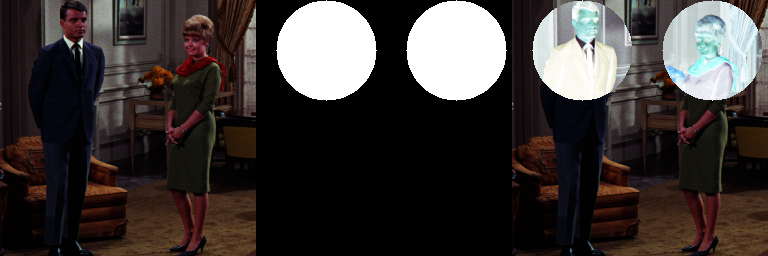

In [ ]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img ^ mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

#**Tugas**
Kelompok 7 ambil bagian berlaku hingga dan foto.



1.   Afifah Salsabila Y.
2.   Salwa Labibah C.
3.   Trisinus Gulo





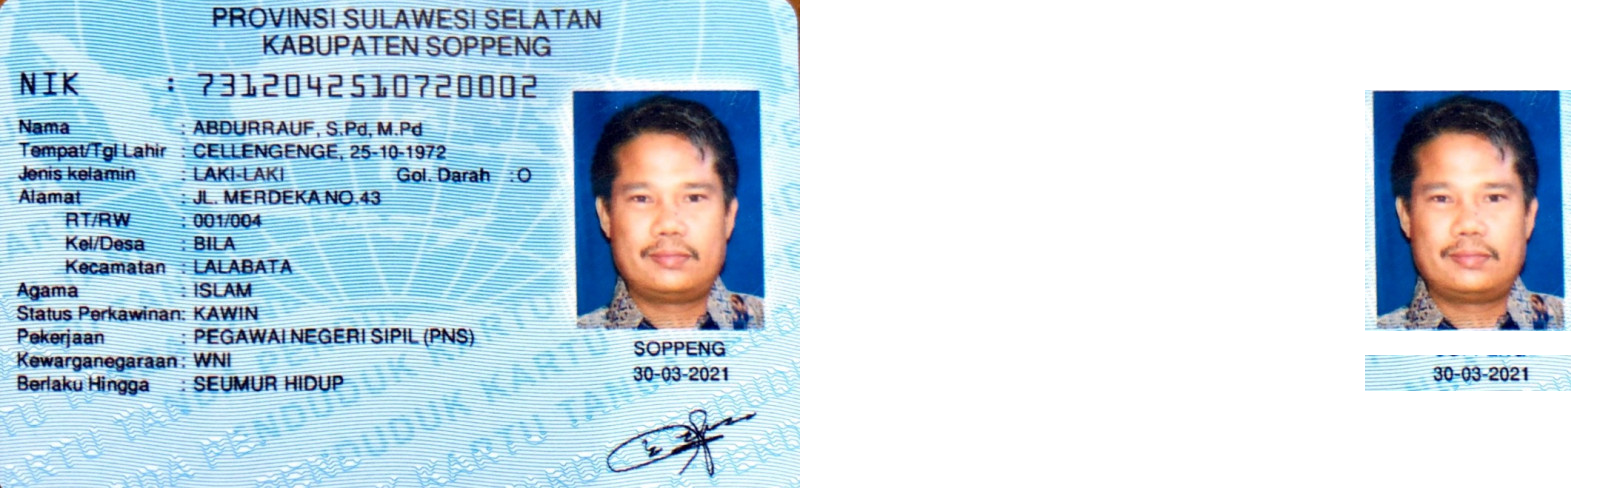

In [115]:
img = cv.imread('/content/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (565, 90), (770, 330), (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask, (565, 355), (770, 390), (255, 255, 255), -1)

masked = img & mask & mask2
masked[mask==0] = 255

final_frame = cv.hconcat((img,masked))
cv2_imshow(final_frame)